In [1]:
import csv
import glob
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import numpy as np

In [2]:
def getAve(arr):
    return sum([int(x) for x in arr]) / len(arr)

def getListOfFiles(re, _pre = 7, _post = 4):
    return sorted(glob.glob(re), key=lambda s: int(s[_pre:-1 * _post]))

def getFirstRowOfCsv(file_name):
    with open(file_name, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',')
        # Retun the first row
        for row in spamreader:
            return row

In [3]:
### Global Variables
y = []
err = []
fileRE = '../experiments/Exp3-aws-ganache-done/sep/Exp3-aws3-redo-again-sep-#trial*.csv'
# fileRE = '../experiments/Exp1-aws-ganache-done/Exp1-aws2-*.csv'
preChar = 26 + 11 + 20 + 15
postChar = 4

In [4]:
### Main Execution

# Core
# for file_name in getListOfFiles(fileRE,preChar,postChar):
#     row = np.asarray(getFirstRowOfCsv(file_name))
    
#     print(file_name, row)

#     y.append(getAve(row))
#     err.append(np.std(row.astype(np.float)))
    
# Sep [files,cols]
rows = np.empty([20,20])
# print(rows)
for row_id,file_name in enumerate(getListOfFiles(fileRE,preChar,postChar)):
    row = np.asarray(getFirstRowOfCsv(file_name))
    
    print(file_name, row)
    rows[row_id] = row

#     y.append(getAve(row))
#     err.append(np.std(row.astype(np.float)))

# print(rows)
rows_t = np.transpose(rows)
# print(rows_t)

for r in rows_t:
    y.append(getAve(r))
    err.append(np.std(r.astype(np.float)))

# print(y)
# print(err)

../experiments/Exp3-aws-ganache-done/sep/Exp3-aws3-redo-again-sep-#trial1.csv ['31' '27' '26' '27' '35' '28' '38' '37' '34' '30' '38' '28' '38' '36'
 '35' '30' '37' '28' '40' '30']
../experiments/Exp3-aws-ganache-done/sep/Exp3-aws3-redo-again-sep-#trial2.csv ['39' '42' '29' '30' '43' '42' '32' '41' '39' '46' '34' '39' '34' '33'
 '39' '42' '35' '35' '35' '41']
../experiments/Exp3-aws-ganache-done/sep/Exp3-aws3-redo-again-sep-#trial3.csv ['43' '35' '37' '44' '51' '44' '46' '47' '47' '39' '52' '47' '49' '48'
 '47' '50' '48' '48' '49' '48']
../experiments/Exp3-aws-ganache-done/sep/Exp3-aws3-redo-again-sep-#trial4.csv ['41' '46' '49' '41' '43' '52' '136' '51' '51' '48' '42' '47' '43' '49'
 '85' '50' '54' '52' '71' '52']
../experiments/Exp3-aws-ganache-done/sep/Exp3-aws3-redo-again-sep-#trial5.csv ['51' '54' '142' '53' '54' '60' '54' '54' '51' '60' '59' '54' '49' '57'
 '149' '55' '57' '59' '60' '50']
../experiments/Exp3-aws-ganache-done/sep/Exp3-aws3-redo-again-sep-#trial6.csv ['62' '62' '58

[52.05 51.9  60.1  52.45 55.7  59.1  69.35 54.9  55.9  65.15 61.45 66.1
 60.25 55.8  71.85 69.1  57.9  58.5  57.7  55.65]
[  5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85  90
  95 100]
[15.95767840257473, 14.892615619829849, 27.908600824835343, 18.10379794407792, 17.607100840286, 27.070094200057746, 55.606901550077396, 14.85563866011825, 18.41168107479597, 32.80285810718328, 20.158062902967636, 59.328660864711914, 35.241843027855396, 17.62554963681984, 46.170634606858066, 47.20688509105425, 14.906039044628859, 18.922209173349714, 15.1099305094365, 14.523343279011208]


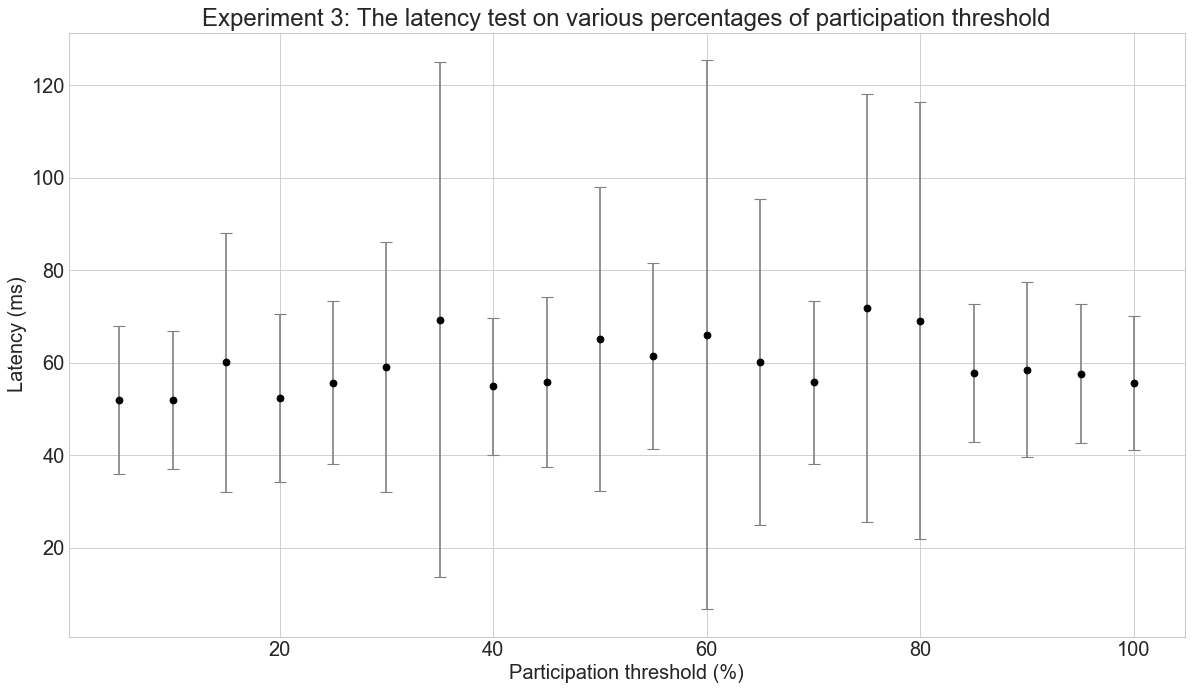

In [7]:
x = np.arange(5,101,5)
# x = np.arange(10,101,10)
y = np.asarray(y)
print(y)
print(x)
print(err)

plt.figure(num=None, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 18})
# plt.xticks(np.arange(0, 21, step=1))
# plt.yticks(np.arange(0, 70000, step=10000))
# plt.xlabel("Number of consensuses (Custodian)")
plt.xlabel("Participation threshold (%)")
plt.ylabel("Latency (ms)")
plt.title("Experiment 3: The latency test on various percentages of participation threshold")
plt.errorbar(x, y, err, fmt="ok", capsize=5, ecolor="grey");